## Bibliotecas/módulos

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

import numpy as np
import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## Dados simulados segundo a função:
$f(x) = x \cdot (\cos(x) + 1) + \zeta; \ \ \zeta \sim \mathcal{N}(0,1)$

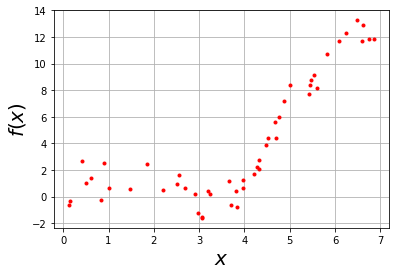

In [19]:
np.random.seed(0)
x = np.random.uniform(0,7,50).reshape(-1,1)
y = x + np.cos(x)*x + np.random.normal(0,1,len(x)).reshape(-1,1)

plt.plot(x,y,'r.')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)
plt.grid()

## Regressão linear (uma variável)

Coeficientes:  [[1.90345681]]
Bias:  [-3.17574943]


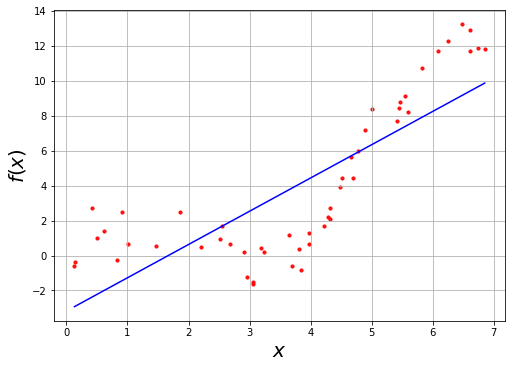

In [20]:
#Instanciação do modelo
regLin = linear_model.LinearRegression()

#Ajuste do modelo
regLin.fit(x,y)
print('Coeficientes: ',regLin.coef_)
print('Bias: ',regLin.intercept_)

#Modelo de perdição...
xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
yEst = regLin.predict(xVals)

FS = (7,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(x,y,s=10,c='r',alpha=0.90)
ax.plot(xVals,yEst,color='blue')
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f(x)$',fontsize=20)
ax.grid()
plt.show()

## Transformação/mapeamento polinomial (de uma variável)

In [43]:
pol = PolynomialFeatures(2)
polX = pol.fit_transform(x)

## Regressão polinomial (uma variável)

Coeficientes:  [[ 0.         -2.31748556  0.60842938]]
Bias:  [1.88120116]


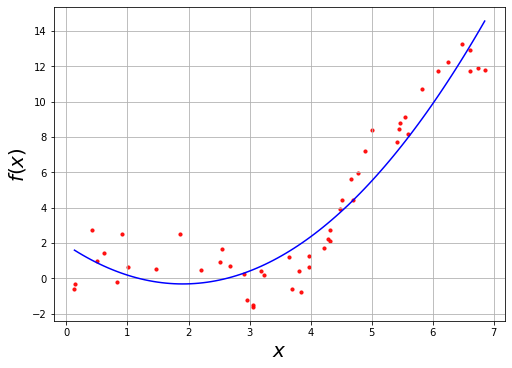

In [44]:
#Instanciação do modelo
regLin = linear_model.LinearRegression()

#Ajuste do modelo
regLin.fit(polX,y)
print('Coeficientes: ',regLin.coef_)
print('Bias: ',regLin.intercept_)

#Modelo de perdição...
xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
polXVals = pol.fit_transform(xVals) #Valores de x devem ser compatibilizados!
yEst = regLin.predict(polXVals)

FS = (7,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(x,y,s=10,c='r',alpha=0.90)
ax.plot(xVals,yEst,color='blue')
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f(x)$',fontsize=20)
ax.grid()
plt.show()

## Regressão Ridge (uma variável)
* Implementação algébrica
* A bibliotaca SKLeanr possui uma implementação própria (vide "linear_model.Ridge(...)")

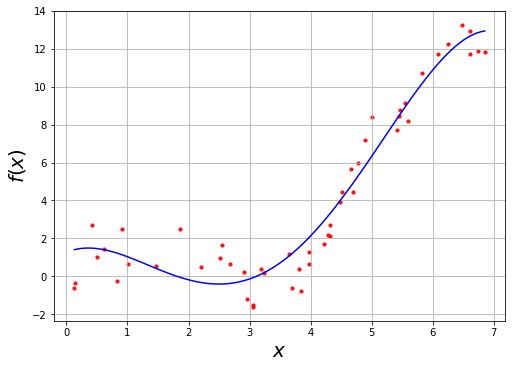

In [41]:
alpha = 1.0 #Parâmetro regularizador

#Cálculos algébricos
xTx  = np.dot(polX.T,polX)
A = alpha*np.identity(xTx.shape[0]); A[0,0]=0
LF = np.linalg.inv(xTx + A)
RF = np.dot(polX.T,y)
thetas = np.dot(LF,RF)

#Estimação do 'bias'
bias = 0.5*np.linalg.norm(thetas/np.sum(np.abs(thetas)))**2

#Modelo de perdição...
xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
polVals = pol.transform(xVals)

#Cálculo das predições (pode ser simplificado e evitar o 'for')
yEst = np.zeros(polVals.shape[0])
for i in range(polVals.shape[0]):
    yEst[i] = np.dot(polVals[i,:],thetas) + bias

FS = (7,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(x,y,s=10,c='r',alpha=0.90)
ax.plot(xVals,yEst,color='blue')
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f(x)$',fontsize=20)
ax.grid()
plt.show()

## Regressão Lasso (uma variável)

[ 0.         -0.         -0.          0.03673908  0.001352  ]
[-0.08253654]


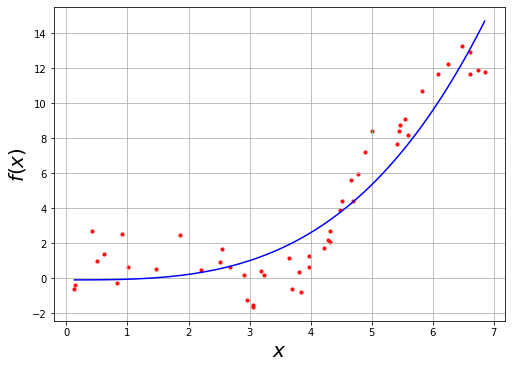

In [42]:
#Instanciação do modelo
regLasso = linear_model.Lasso(alpha=1.0, max_iter=1000, tol=10**-2)

#Ajuste do modelo
regLasso.fit(polX,y)

print(regLasso.coef_)
print(regLasso.intercept_)

#Modelo de perdição...
xVals = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
polVals = pol.transform(xVals)
yEst = regLasso.predict(polVals)

FS = (7,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

plt.scatter(x,y,s=10,c='r',alpha=0.90)
plt.plot(xVals,yEst,color='blue')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)
plt.grid()
plt.show()